# Unit 5 - Financial Planning


In [66]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [67]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [68]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [69]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [70]:
# Fetch current BTC price
current_btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
current_eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68936.40
The current value of your 5.3 ETH is $21842.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [71]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [72]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

### Here I tried to get code that will always reflect the current day when running this code however I face a problem where if it is a non-trading day, this code would not work.

In [73]:
# Set variable to current date
x = pd.datetime.now().date()

C:\Users\ikki_\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [74]:
# Format current date as ISO format
today = pd.Timestamp(x, tz="Australia/Sydney").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
market_data = alpaca.get_barset(tickers,timeframe,start = today,end = today,).df

# Preview DataFrame
market_data.head()

AGG                                    SPY  \
                             open    high     low   close  volume   open   
time                                                                       
2021-05-10 00:00:00-04:00  114.61  114.67  114.58  114.65  692552  422.5   

                                                           
                             high     low  close   volume  
time                                                       
2021-05-10 00:00:00-04:00  422.74  421.66  422.4  8045135

In [75]:
# Pick AGG and SPY close prices
agg_close_price = float(market_data['AGG']['close'])
spy_close_price = float(market_data['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:.2f}")
print(f"Current SPY closing price: ${spy_close_price:.2f}")

Current AGG closing price: $114.65
Current SPY closing price: $422.40


In [77]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21120.00
The current value of your 200 AGG shares is $22930.00


### Savings Health Analysis

In [101]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_savings = my_btc_value + my_eth_value
shares_savings = my_spy_value + my_agg_value
indices = ['crypto','shares']
amounts = [crypto_savings, shares_savings]
#df_savings = pd.DataFrame(data = amounts,index = indices, columns = ['amount'])
df_savings = pd.DataFrame(data = [crypto_savings,shares_savings], index=['crypto','shares'], columns = ['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,90779.025
shares,44050.000


array([<AxesSubplot:ylabel='[crypto, shares]'>], dtype=object)

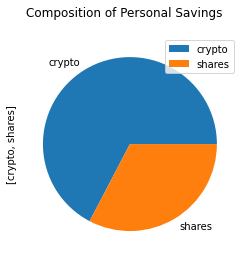

In [128]:
# Plot savings pie chart
df_savings.plot.pie(subplots = True, xlabel = 'amount',ylabel = indices, title = 'Composition of Personal Savings') 

### Had problems trying to add a title and other labels to look similar as notebook output.

In [139]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_savings + shares_savings

# Validate saving health
if total_savings > emergency_fund:
    print (f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print (f"Congratulations! You have reached your financial goal.")
elif total_savings < emergency_fund:
    print (f"You are {emergency_fund-total_savings} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [175]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
y = x.replace(year=x.year-5)
start_date = pd.Timestamp(y, tz='America/New_York').isoformat()
end_date = pd.Timestamp(x, tz='America/New_York').isoformat()

In [176]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers,timeframe,start=start_date, end= end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-19 00:00:00-04:00  109.51  109.535  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.480  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.530  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.500  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.490  109.3701  109.460  1382257.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-05-19 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-22 00:00:00-04:00  238.90  239.71  238.82  239.53  37630972.0  
2017-05-23 00:00:00-04:00  239.95  240.24  239.51  240.02  36771135.0  
2017-05-24 00:00:00-04:00  240.32  240.73  239.93  240.59  37423590.0  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71  45278321.0

### *API only allows for 1000 data points.

In [177]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio = MCSimulation(portfolio_data = df_stock_data, weights = [.4,.6], num_simulation = 500,num_trading_days = 252*30)

In [178]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-19 00:00:00-04:00  109.51  109.535  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.480  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.530  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.500  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.490  109.3701  109.460  1382257.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-19 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   
2017-05-24 00:00:00-04:00     0.001922  240.32  240.73  239.93  240.59   
2017-05-25 00:00:00-04:00     0.000091  241.20  242.08  240.96  241.71   

                                                    
                               volume daily_return  
time                                                
2017-05-19 00:00:00-04:00         NaN          NaN  
2017-05-22 00:00:00-04:00  37630972.0          NaN  
2017-05-23 00:00:00-04:00  36771135.0     0.002046  
2017-05-24 00:00:00-04:00  37423590.0     0.002375  
2017-05-25 00:00:00-04:00  45278321.0     0.004655

In [179]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992023,1.028243,1.010452,0.999433,0.998599,0.996580,1.005679,1.004816,1.011277,1.001889,...,0.997203,0.995467,0.999463,1.001200,1.008487,0.993301,1.004267,0.984072,1.008557,1.011456
2,0.999343,1.032477,1.020710,0.996695,0.986876,0.995897,1.005244,1.010890,1.010770,1.011325,...,1.008058,0.993268,0.998876,1.016519,1.017254,0.988866,1.004042,0.993205,1.027696,1.016536
3,1.009027,1.038762,1.021600,0.992341,0.973962,1.000393,1.010383,1.009627,1.000090,1.024568,...,1.008183,0.992724,0.994333,1.020207,1.025873,0.981025,1.014701,1.003254,1.035277,1.031438
4,1.017293,1.037027,1.004867,1.007947,0.970529,1.017085,1.029577,0.998541,1.007577,1.035966,...,1.004563,0.990212,1.003451,1.024940,1.014420,0.983372,1.018195,1.006069,1.030466,1.039598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.738522,24.706716,6.707975,32.173238,44.332363,18.909583,3.042052,8.020948,57.575260,8.846873,...,47.751092,27.751649,10.433179,5.883082,40.679133,19.806352,25.479409,10.752119,14.015573,11.363418
7557,7.780739,24.757433,6.670122,31.803930,44.626762,18.875148,3.029996,8.097286,57.343932,8.879834,...,47.494715,27.823256,10.564000,5.798531,40.776276,19.557633,25.528486,10.657764,13.978465,11.253788
7558,7.792171,24.924619,6.683479,31.915493,43.552700,18.883421,3.064668,8.095594,57.762401,8.896210,...,47.441997,27.786791,10.582056,5.834874,41.070864,19.526238,25.758715,10.588530,13.933527,11.218653
7559,7.749285,25.053896,6.533460,32.049928,43.333000,18.885531,3.063290,8.122045,57.340698,9.036435,...,47.029369,27.717557,10.606500,5.754991,41.187249,19.274889,25.645194,10.630399,13.920813,11.205480


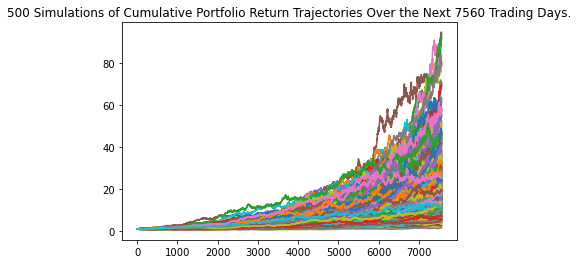

In [180]:
# Plot simulation outcomes
port_line_plot = MC_portfolio.plot_simulation()

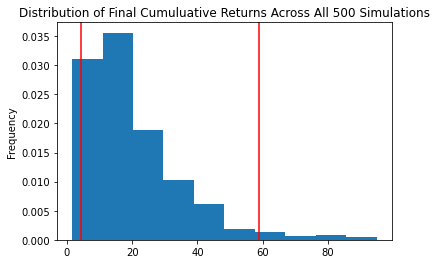

In [181]:
# Plot probability distribution and confidence intervals
port_dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [185]:
# Fetch summary statistics from the Monte Carlo simulation results
port_summary_statistics = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(port_summary_statistics)

count           500.000000
mean             20.321467
std              14.781953
min               1.605877
25%              10.382506
50%              15.747004
75%              26.125219
max              94.860055
95% CI Lower      4.308895
95% CI Upper     58.779594
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [186]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(port_summary_statistics[8]*initial_investment,2)
ci_upper = round(port_summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86177.91 and $1175591.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [188]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(port_summary_statistics[8]*initial_investment,2)
ci_upper = round(port_summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129266.86 and $1763387.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

Assuming in this options, we choose a more risky portfolio with 80% stocks(SPY) and 20% bonds(AGG).
Our initial investment is now adjusted to $200,000 show the difference of a riskier portfolio with higher investment amount over a shorter period of investment.

In [189]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
challenge_MC_portfolio = MCSimulation(portfolio_data = df_stock_data, weights = [.2,.8], num_simulation = 500,num_trading_days = 252*5)

In [190]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
challenge_MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005731,0.997748,1.003855,1.005777,0.998863,0.993806,0.988940,1.005740,1.005752,1.010475,...,0.994575,1.020763,0.999737,1.008706,1.007580,1.013018,1.007864,1.000275,1.002077,1.019814
2,1.011212,1.016606,1.010287,1.001186,0.998721,0.993058,0.992468,0.992370,1.013319,1.013048,...,1.008863,1.023074,0.983869,1.008781,1.022598,1.007332,0.999138,1.000925,0.989867,0.993465
3,1.017392,1.012320,0.994781,0.990312,0.996142,0.994308,0.998728,0.993256,1.013522,1.013505,...,1.009198,1.032035,0.977841,1.015014,1.034354,0.991291,0.993521,1.017752,0.990828,0.992675
4,1.005841,1.010564,0.998929,0.998398,0.993898,0.994711,1.017850,1.003510,1.009140,1.000765,...,1.014267,1.051917,0.968057,1.032271,1.024856,0.998900,0.984556,1.006067,0.987189,0.997093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.467513,0.871964,0.618315,1.381361,1.546931,1.604937,1.345431,2.245862,1.451127,1.372702,...,1.603904,1.972518,1.227614,2.943130,1.272452,2.151768,2.450738,2.049946,1.302041,0.959916
1257,1.465110,0.850868,0.617591,1.371256,1.533154,1.596333,1.347111,2.251587,1.450068,1.379964,...,1.609195,1.971232,1.207485,3.026924,1.275510,2.148454,2.478082,2.019038,1.287146,0.962028
1258,1.450574,0.843244,0.615036,1.390368,1.534857,1.570335,1.354600,2.255030,1.449017,1.362245,...,1.603392,1.972549,1.207712,3.014505,1.277167,2.087266,2.474358,2.013244,1.269839,0.963434
1259,1.445118,0.842004,0.606981,1.406556,1.543616,1.600443,1.370633,2.260011,1.449954,1.371658,...,1.598879,1.953010,1.229203,2.994075,1.270791,2.095745,2.515385,2.049812,1.260744,0.966420


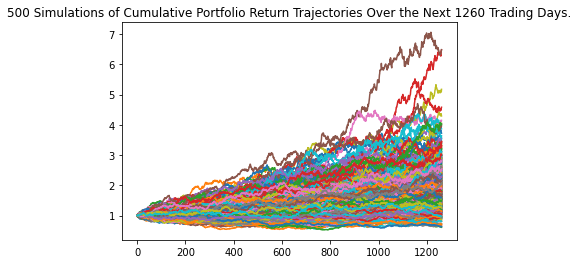

In [193]:
# Plot simulation outcomes
challenge_line_plot = challenge_MC_portfolio.plot_simulation()

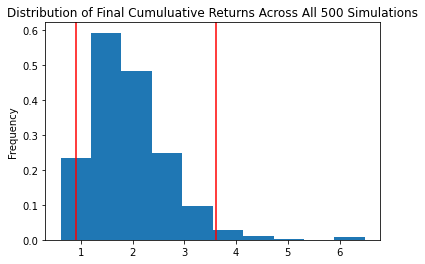

In [194]:
# Plot probability distribution and confidence intervals
challenge_dist_plot = challenge_MC_portfolio.plot_distribution()

In [195]:
# Fetch summary statistics from the Monte Carlo simulation results
challenge_summary_statistics = challenge_MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(challenge_summary_statistics)

count           500.000000
mean              1.928397
std               0.756358
min               0.608543
25%               1.413465
50%               1.807912
75%               2.294372
max               6.488072
95% CI Lower      0.898913
95% CI Upper      3.607408
Name: 1260, dtype: float64


In [198]:
# Set initial investment
challenge_initial_investment = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(challenge_summary_statistics[8]*challenge_initial_investment,2)
ci_upper_five = round(challenge_summary_statistics[9]*challenge_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${challenge_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $200000 in the portfolio over the next 5 years will end within in the range of $179782.62 and $721481.53


### Ten Years Retirement Option

In [199]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
challenge_MC_portfolio2 = MCSimulation(portfolio_data = df_stock_data, weights = [.2,.8], num_simulation = 500,num_trading_days = 252*10)

In [200]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
challenge_MC_portfolio2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010402,1.005508,0.999984,1.013970,1.005568,0.992282,1.006189,0.990904,0.981032,0.995685,...,1.009209,0.990986,0.989001,0.983102,0.990283,1.009100,0.983889,1.009243,1.003493,0.995861
2,1.027887,1.004811,1.010026,1.009140,1.000441,0.995608,1.013277,0.976685,0.972946,0.980743,...,1.009568,1.001470,0.992743,0.995321,0.983176,1.011983,0.993356,1.007658,1.009108,0.990510
3,1.033838,0.988116,1.017564,1.008165,0.996447,0.992440,0.993440,0.969868,0.944572,0.973102,...,1.008312,1.026848,0.978806,0.991658,0.977993,1.009021,1.004943,1.020867,0.997574,0.991054
4,1.049337,0.973672,1.008778,1.007635,1.002324,0.998381,0.990061,0.982711,0.938563,0.953029,...,1.003740,1.010782,0.986446,1.016597,0.986785,0.999661,0.993975,1.025916,1.005647,0.973386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.865387,6.252283,1.275011,1.406876,5.842307,1.454251,1.517373,2.035186,5.444635,3.507753,...,2.974343,5.949842,3.284647,4.255099,4.238388,4.591112,6.085903,2.185837,4.179596,6.406976
2517,2.877620,6.222188,1.269335,1.416391,5.882145,1.434131,1.495537,2.010120,5.497794,3.462711,...,2.970457,6.014161,3.272344,4.196257,4.165600,4.610754,6.041131,2.200256,4.170664,6.494698
2518,2.841743,6.205747,1.271429,1.425955,5.870365,1.417374,1.509272,2.011706,5.529949,3.472396,...,2.965795,6.141064,3.251398,4.215041,3.994478,4.694777,6.111376,2.222252,4.119033,6.671053
2519,2.824482,6.117232,1.282839,1.411367,5.882460,1.435237,1.510840,1.999470,5.591104,3.433557,...,2.943219,6.123122,3.204100,4.285377,4.034388,4.707497,6.080426,2.245785,4.070726,6.648224


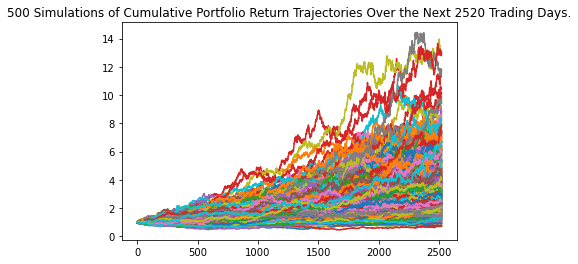

In [201]:
# Plot simulation outcomes
chal2_line_plot = challenge_MC_portfolio2.plot_simulation()

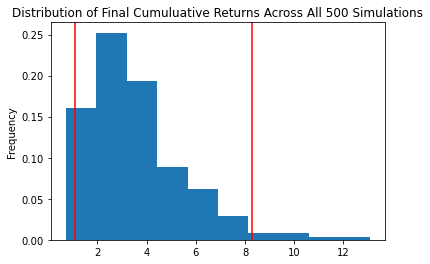

In [202]:
# Plot probability distribution and confidence intervals
chal2_dist_plot = challenge_MC_portfolio2.plot_distribution()

In [204]:
# Fetch summary statistics from the Monte Carlo simulation results
chal2_summary_statistics = challenge_MC_portfolio2.summarize_cumulative_return()

# Print summary statistics
print(chal2_summary_statistics)

count           500.000000
mean              3.576449
std               1.969439
min               0.713763
25%               2.205741
50%               3.163525
75%               4.418968
max              13.084004
95% CI Lower      1.090756
95% CI Upper      8.269826
Name: 2520, dtype: float64


In [205]:
# Set initial investment
chal2_initial_investment = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(chal2_summary_statistics[8]*chal2_initial_investment,2)
ci_upper_ten = round(chal2_summary_statistics[9]*chal2_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${chal2_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $200000 in the portfolio over the next 10 years will end within in the range of $218151.3 and $1653965.24
